https://www.cs.cornell.edu/projects/kddcup/datasets.html

# load libraries

In [2]:
# https://github.com/alvinwan/tex2py
!pip install tex2py

  Using cached https://files.pythonhosted.org/packages/ca/e1/2f229554e5c273962fae8b286395d5bbcc7bef276d2b40e1bad954993db2/pytest-5.1.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/81/f9/da2ad9334f60e418cb229c58724330be2635b369676d3eec8f61e1f85faa/coveralls-1.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/30/7d/7f6a78ae44a1248ee28cc777586c18b28a1df903470e5d34a6e25712b8aa/pytest_cov-2.5.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/52/90/6155aa926f43f2b2a22b01be7241be3bfd1ceaf7d0b3267213e8127d41f4/atomicwrites-1.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/45/dc/3241eef99eb45f1def35cf93af35d1cf9ef4c0991792583b8f33ea41b092/more_itertools-7.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/92/c7/48439f7d5fd6bddb4c04b850bb862b42e3e2b98570040dfaf68aedd8114b/pluggy-0.13.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packag

In [3]:
# https://github.com/alvinwan/TexSoup
!pip install texsoup

In [4]:
import re
import time
import glob
import matplotlib.pyplot as plt

# load data

In [7]:
list_of_files = glob.glob('hep-th/2003/*')

In [8]:
len(list_of_files)

1019

# find relevant tags in latex

In [11]:
start_time=time.time()
reslts={}
number_of_eq=0
for this_file in list_of_files:
    with open(this_file,'rb') as f:
        data = f.read()
    
    resp = re.findall('\\\\begin{(?:eqnarray|equation|multiline)}.*?end{(?:eqnarray|equation|multiline)}',str(data),re.DOTALL)
#    print(this_file)
    for eq in resp:
        number_of_eq+=1
        try:
            reslts[this_file].append(eq)
        except KeyError:
            reslts[this_file]=[]
            reslts[this_file].append(eq)
#        print('  ',eq,'\n')

print(round(time.time()-start_time,2),'seconds')

7.63 seconds


In [12]:
number_of_eq

29481

In [13]:
len(reslts.keys())

929

In [20]:
reslts[list(reslts.keys())[0]]

['\\begin{equation}}\\n\\\\newcommand{\\\\eeq}{\\\\end{equation}',
 '\\begin{eqnarray}}\\n\\\\newcommand{\\\\eeqa}{\\\\end{eqnarray}']

In [26]:
reslts[list(reslts.keys())[1]][0]

'\\begin{equation}\\\\label{planewave}\\n\\\\begin{split}\\nds^2 & = 2dx^+dx^--\\\\m^2\\\\vec{x}^2\\\\bigl(dx^+\\\\bigr)^2+d\\\\vec{x}^2\\\\,,\\\\\\\\\\nF_5 & = 4\\\\m dx^+\\\\wedge\\\\bigl(dx^1\\\\wedge dx^2\\\\wedge dx^3\\\\wedge dx^4+dx^5\\\\wedge dx^6\\\\wedge dx^7\\\\wedge dx^8\\\\bigr)\\\\,.\\n\\\\end{split}\\n\\\\end{equation}'

# visualize results

In [14]:
number_of_eq_per_file=[]
for k,v in reslts.items():
    number_of_eq_per_file.append(len(v))

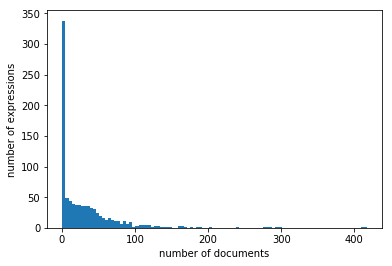

In [15]:
_=plt.hist(number_of_eq_per_file,bins=100)
_=plt.ylabel('number of expressions')
_=plt.xlabel('number of documents')

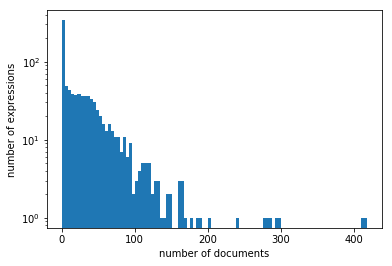

In [16]:
_=plt.hist(number_of_eq_per_file,bins=100)
_=plt.yscale('log', nonposy='clip')
_=plt.ylabel('number of expressions')
_=plt.xlabel('number of documents')

# parse the Latex


options: 
* http://plastex.sourceforge.net/plastex/sect0025.html
* tex2py
* texsoup

In [9]:
# https://github.com/alvinwan/tex2py
from tex2py import tex2py

In [10]:
list_of_files[1]

'hep-th/2003/0304232'

In [11]:
with open(list_of_files[1]) as f: data = f.read()
toc = tex2py(data)

In [12]:
from TexSoup import TexSoup
soup = TexSoup(data)

In [13]:
soup.equation

\begin{equation}\label{planewave}
\begin{split}
ds^2 & = 2dx^+dx^--\m^2\vec{x}^2\bigl(dx^+\bigr)^2+d\vec{x}^2\,,\\
F_5 & = 4\m dx^+\wedge\bigl(dx^1\wedge dx^2\wedge dx^3\wedge dx^4+dx^5\wedge dx^6\wedge dx^7\wedge dx^8\bigr)\,.
\end{split}
\end{equation}

In [14]:
lst = list(soup.find_all('equation'))

In [39]:
len(lst) # how many equations are in the document?

79

In [35]:
lst[0] # show the first match

\begin{equation}\label{planewave}
\begin{split}
ds^2 & = 2dx^+dx^--\m^2\vec{x}^2\bigl(dx^+\bigr)^2+d\vec{x}^2\,,\\
F_5 & = 4\m dx^+\wedge\bigl(dx^1\wedge dx^2\wedge dx^3\wedge dx^4+dx^5\wedge dx^6\wedge dx^7\wedge dx^8\bigr)\,.
\end{split}
\end{equation}

In [40]:
lst[0][0] # what is the string inside the "begin{equation}"?

'\\label{planewave}\n\\begin{split}\nds^2 & = 2dx^+dx^--\\m^2\\vec{x}^2\\bigl(dx^+\\bigr)^2+d\\vec{x}^2\\,,\\\\\nF_5 & = 4\\m dx^+\\wedge\\bigl(dx^1\\wedge dx^2\\wedge dx^3\\wedge dx^4+dx^5\\wedge dx^6\\wedge dx^7\\wedge dx^8\\bigr)\\,.\n'

In [37]:
lst[1]

\begin{equation}
\o_n=\sqrt{n^2+\bigl(\m\a'p^+\bigr)^2}\,,\qquad n\in\Nop\,,
\end{equation}

In [36]:
lst[1][0]

"\n\\o_n=\\sqrt{n^2+\\bigl(\\m\\a'p^+\\bigr)^2}\\,,\\qquad n\\in\\Nop\\,,\n"

In [38]:
for this_eq in soup.find_all('equation'):
    print(this_eq[0])

\label{planewave}
\begin{split}
ds^2 & = 2dx^+dx^--\m^2\vec{x}^2\bigl(dx^+\bigr)^2+d\vec{x}^2\,,\\
F_5 & = 4\m dx^+\wedge\bigl(dx^1\wedge dx^2\wedge dx^3\wedge dx^4+dx^5\wedge dx^6\wedge dx^7\wedge dx^8\bigr)\,.


\o_n=\sqrt{n^2+\bigl(\m\a'p^+\bigr)^2}\,,\qquad n\in\Nop\,,

\label{dict}
\frac{1}{\m}H = \D-J\,,\qquad \frac{1}{\bigl(\m\a'p^+\bigr)^2} = \frac{g^2_{\text{YM}}N}{J^2}\equiv \l'\,,\qquad
4\pi g_{\text{s}}\bigl(\m\a'p^+\bigr)^2 = \frac{J^2}{N}\equiv g_2


N\to\infty\quad\text{and}\quad J\to\infty\quad\text{with}\quad\frac{J^2}{N}\quad
\text{fixed}\,,\quad g_{\text{YM}}\quad\text{fixed}\,,


S_{\mbox{\scriptsize bos.}(r)}=\frac{e(\a_r)}{4\pi\a'}\int\,d\t\int_0^{2\pi|\a_r|}
\,d\s_r\bigl[\dot{x}_r^2-x^{\prime\,2}_r-\m^2x_r^2\bigr]\,,


\begin{split}
x_r^I(\s_r)& = x_{0(r)}^I+\sqrt{2}\sum_{n=1}^{\infty}
\bigl(x_{n(r)}^I\cos\frac{n\s_r}{|\a_r|}+x_{-n(r)}^I\sin\frac{n\s_r}{|\a_r|}\bigr)\,,\\
p_r^I(\s_r) & =\frac{1}{2\pi|\a_r|}\bigl[p_{0(r)}^I+\sqrt{2}\sum_{n=1}^{\infty}
\bigl(p_{n(r